1. Import Libraries
2. Import Data
3. Data Exploration
4. Data Cleaning
5. Benchmark Model
   5.1. Train-Test split
   5.2. Fit a model to the data
   5.3. Model Evaluation
   5.4. Fix Problems
6. Feature Engineering
7. Model Training
   7.1. Decision Tree
   7.2. Random Forest - Overfit - Underfit
   7.3. Gradient Boosting
   7.4. Comparing algorithm perfomance
8. Tuning
   8.1. Find Best Parameters
9. Classification

### 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### 1. Import Data

In [2]:
taxi_jan_2024 = pd.read_csv('data/yellow-tripdata-2024-01.csv')
taxi_data = pd.concat([taxi_jan_2024])

c:\users\abhin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,5,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,N,48,68,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0
1,2,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,N,231,164,1,13.5,1.0,0.5,2.00,0.0,1.0,20.50,2.5,0.0
2,2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,N,90,233,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0
3,2,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,N,141,244,1,27.5,1.0,0.5,6.50,0.0,1.0,39.00,2.5,0.0
4,2,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,N,79,246,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0


### 2. Data Exploration

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [5]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
                       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,48,68,1,19.68
1,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,231,164,1,20.50
2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,90,233,1,19.68
3,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,141,244,1,39.00
4,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,79,246,1,28.08


array([[<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'PULocationID'}>],
       [<AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>]],
      dtype=object)

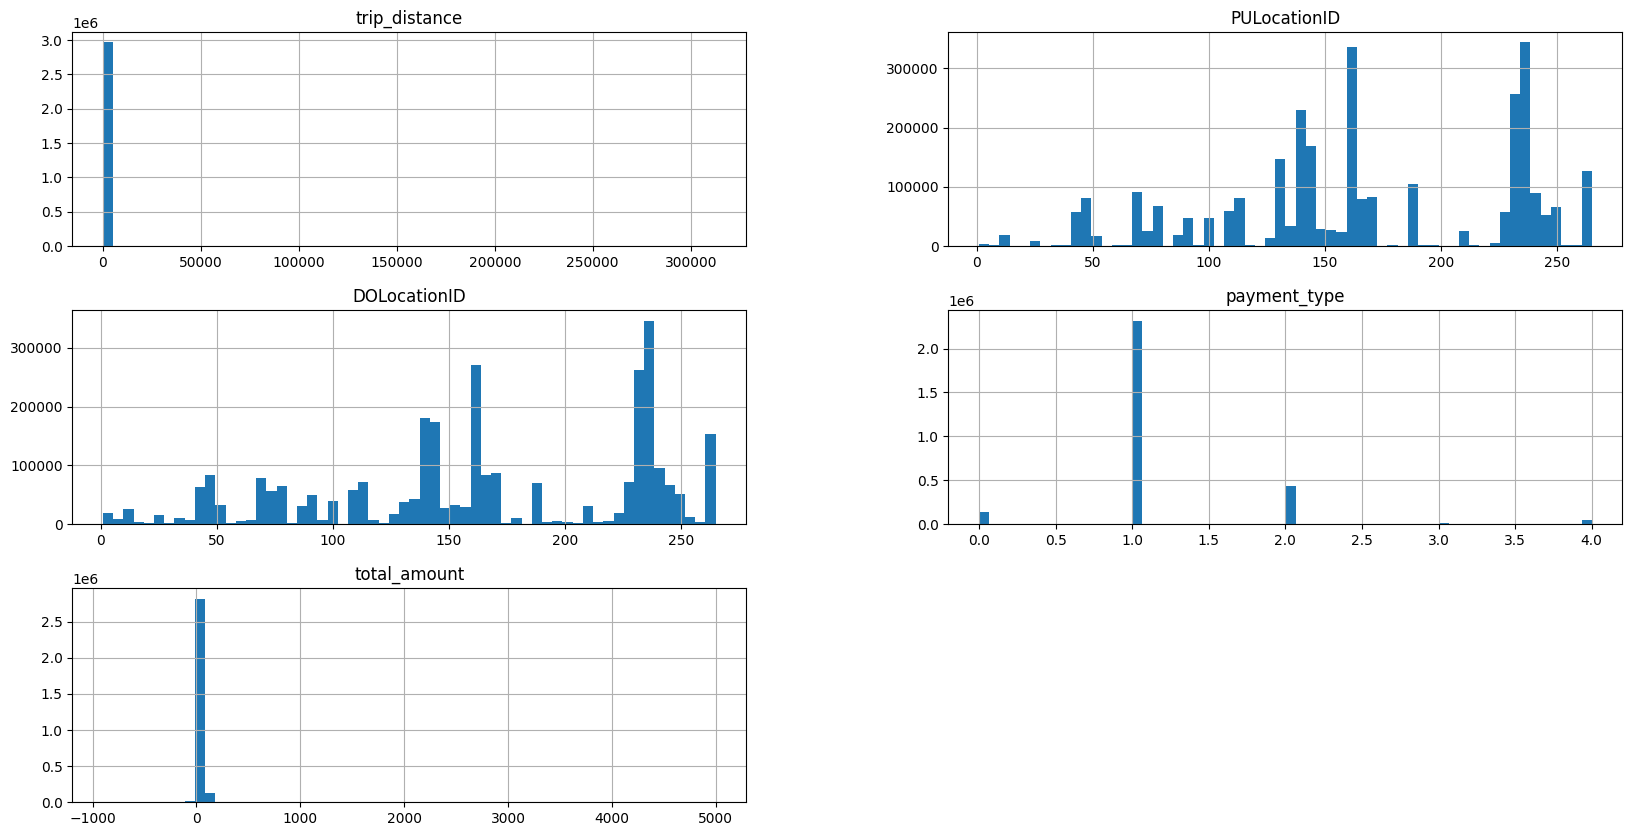

In [7]:
taxi_data.hist(figsize= (20,10), bins = 60)

In [8]:
taxi_data['RatecodeID'].value_counts()

1     2657230
\N     140162
2       98515
99      28662
5       19349
3        7944
4        6341
1        6120
2         198
5          61
4          24
3          10
6           7
99          1
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

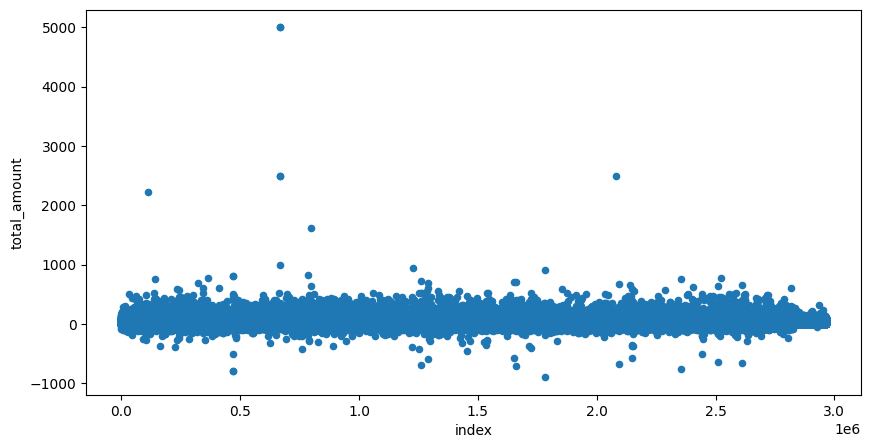

In [9]:
taxi_data.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize= (10, 5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

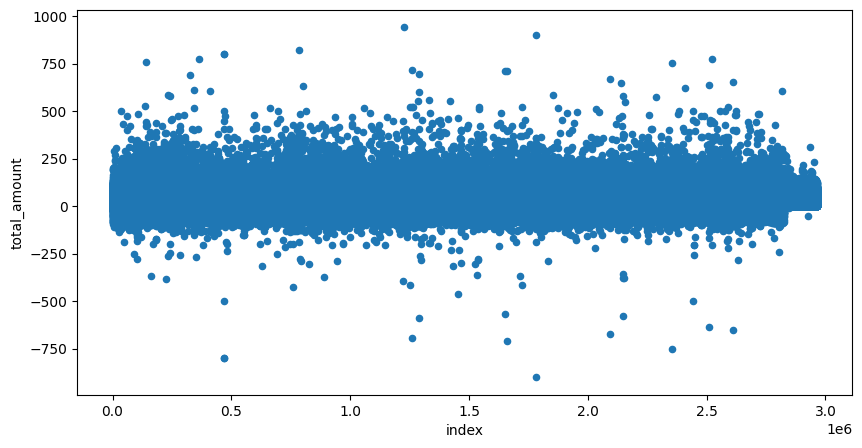

In [10]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10, 5))

(35504, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

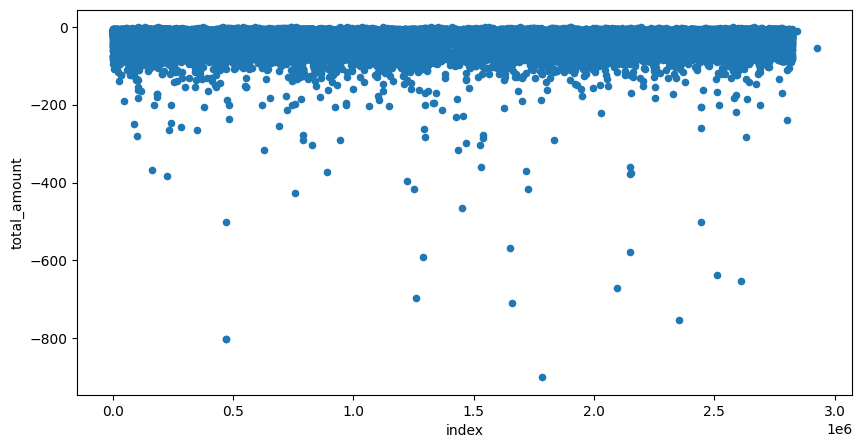

In [11]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind = 'scatter', y = "total_amount", x = 'index', figsize = (10,5))

In [12]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
18,2024-01-13 03:39:41.000000,2024-01-13 03:59:26.000000,1,3.61,1,48,145,4,-20.18
102,2024-01-13 03:04:52.000000,2024-01-13 03:08:22.000000,4,0.35,1,230,48,4,-10.10
166,2024-01-13 03:30:09.000000,2024-01-13 03:31:44.000000,2,0.04,1,141,141,4,-8.70
184,2024-01-13 03:39:11.000000,2024-01-13 04:02:41.000000,1,10.82,1,230,241,4,-49.30
225,2024-01-13 03:59:41.000000,2024-01-13 04:26:35.000000,1,1.69,1,141,237,4,-27.60


In [13]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

4    21406
2     8326
3     5741
1       29
0        2
Name: payment_type, dtype: int64

<AxesSubplot:>

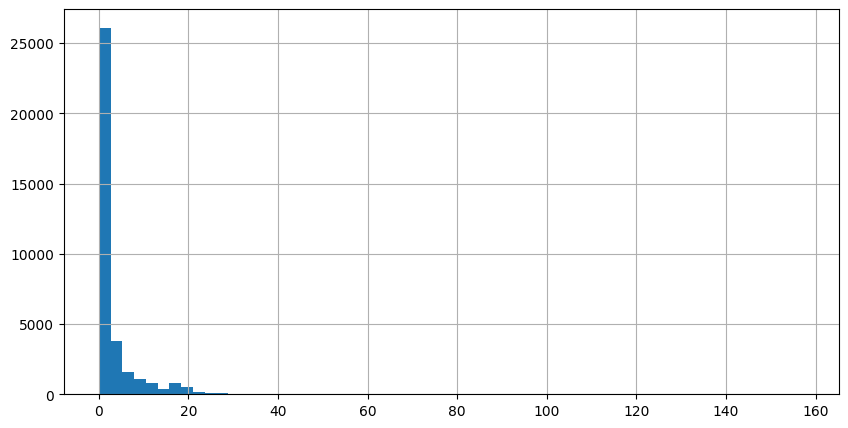

In [14]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 60, figsize = (10,5))

In [15]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
6326,2024-01-13 09:29:14.000000,2024-01-13 09:32:54.000000,1,0.3,1,107,137,4,0.0
28271,2024-01-13 13:55:51.000000,2024-01-13 13:56:01.000000,1,0.0,1,264,264,1,0.0
37725,2024-01-13 15:40:32.000000,2024-01-13 15:40:32.000000,1,0.0,5,216,264,2,0.0
46974,2024-01-13 16:10:36.000000,2024-01-13 16:10:36.000000,1,0.0,1,264,264,2,0.0
46975,2024-01-13 16:10:36.000000,2024-01-13 16:18:44.000000,1,0.0,1,264,264,1,0.0


In [16]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    129
4    128
3     83
2     65
0     11
Name: payment_type, dtype: int64

<AxesSubplot:>

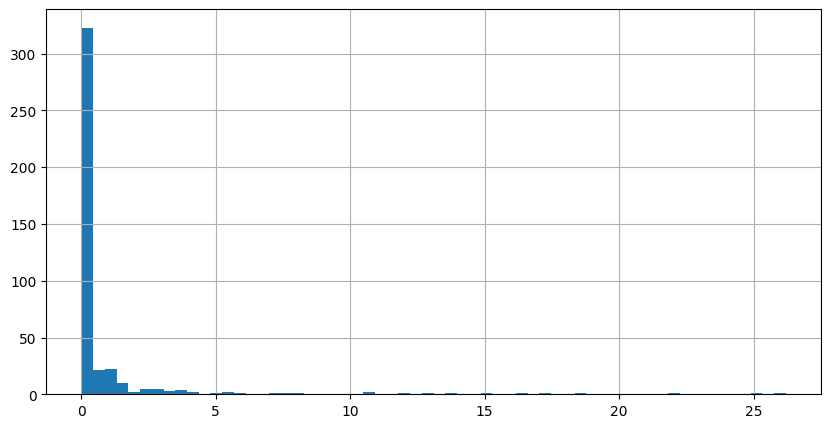

In [17]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins = 60, figsize=(10,5))

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.70       5
0.80       5
0.30       4
1.30       4
1.10       4
0.60       4
2.50       3
3.00       3
0.40       3
1.80       2
3.80       2
1.70       2
3.40       2
2.40       2
10.70      2
5.80       1
17.10      1
2.90       1
18.40      1
25.10      1
12.10      1
1.40       1
12.80      1
1.74       1
15.00      1
4.20       1
3.30       1
8.10       1
4.90       1
2.70       1
1.20       1
5.50       1
5.30       1
4.00       1
21.90      1
16.50      1
3.50       1
26.20      1
13.60      1
7.70       1
3.60       1
7.00       1
Name: trip_distance, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

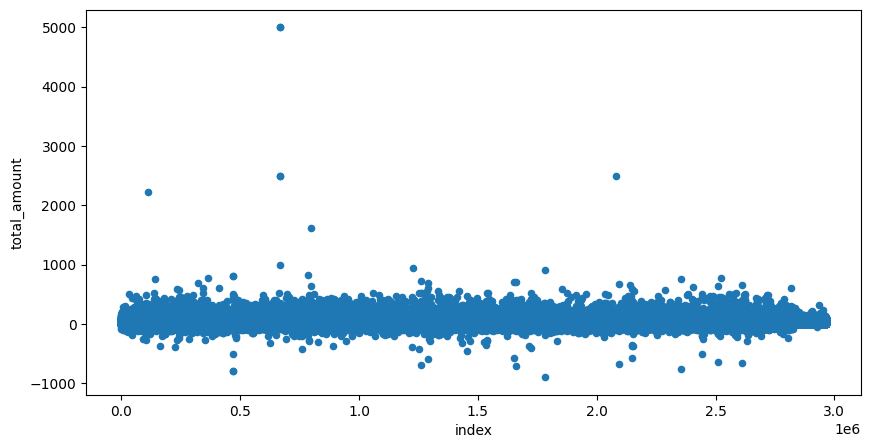

In [19]:
taxi_data.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10,5))

In [20]:
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [21]:
taxi_data['total_amount'].mean()

26.80150477092542

### 3. Data Cleaning

In [22]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<200)]

In [23]:
print(taxi_data.shape)
taxi_data_filtered.shape

(2964624, 9)


(2926691, 9)

In [24]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

### 4. Data Preparation

In [25]:
taxi_data_prepared = taxi_data_filtered.copy()

In [26]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count           object
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [27]:
taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

In [28]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [29]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [30]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared.loc[:, 'transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared.loc[:, 'transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared.loc[:, 'transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared.loc[:, 'transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [31]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-13 03:18:09,2024-01-13 03:24:37,1,2.31,1,48,68,1,19.68,2024-01-13,2024,1,13,3
1,2024-01-13 03:52:58,2024-01-13 04:01:18,1,2.61,1,231,164,1,20.50,2024-01-13,2024,1,13,3
2,2024-01-13 03:26:02,2024-01-13 03:34:43,1,1.79,1,90,233,1,19.68,2024-01-13,2024,1,13,3
3,2024-01-13 03:53:44,2024-01-13 04:10:56,1,6.58,1,141,244,1,39.00,2024-01-13,2024,1,13,3
4,2024-01-13 02:58:28,2024-01-13 03:14:33,1,3.40,1,79,246,1,28.08,2024-01-13,2024,1,13,2


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>]], dtype=object)

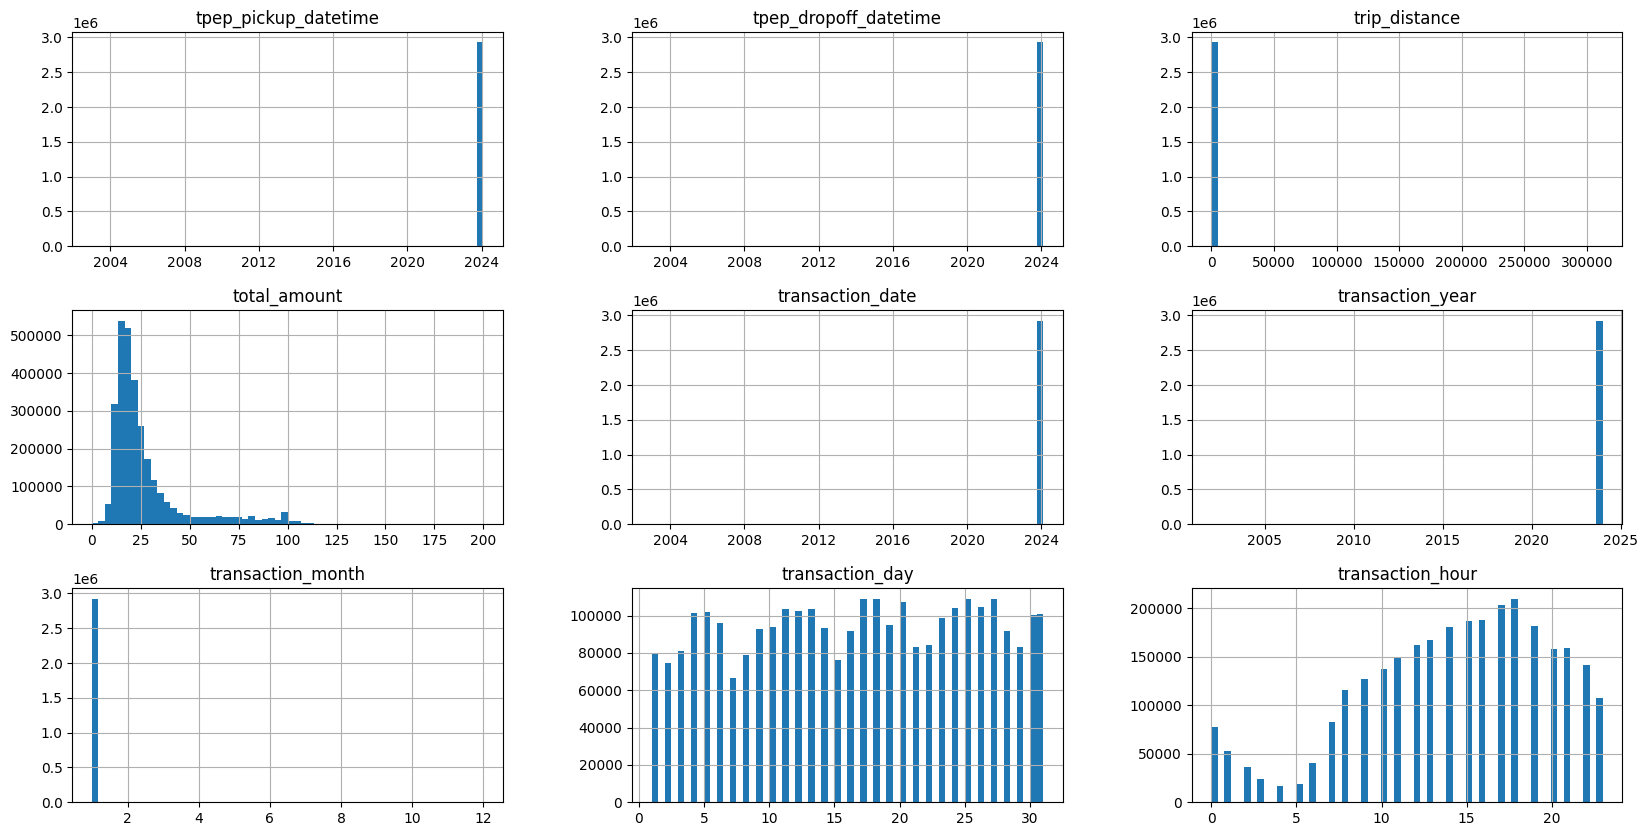

In [32]:
taxi_data_prepared.hist(figsize = (20,10), bins = 60)

In [33]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [34]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [35]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2926674, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,48,2024-01-13,1,13,3,2.31,19.68
1,231,2024-01-13,1,13,3,2.61,20.50
2,90,2024-01-13,1,13,3,1.79,19.68
3,141,2024-01-13,1,13,3,6.58,39.00
4,79,2024-01-13,1,13,2,3.40,28.08


In [36]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(77408, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<AxesSubplot:>

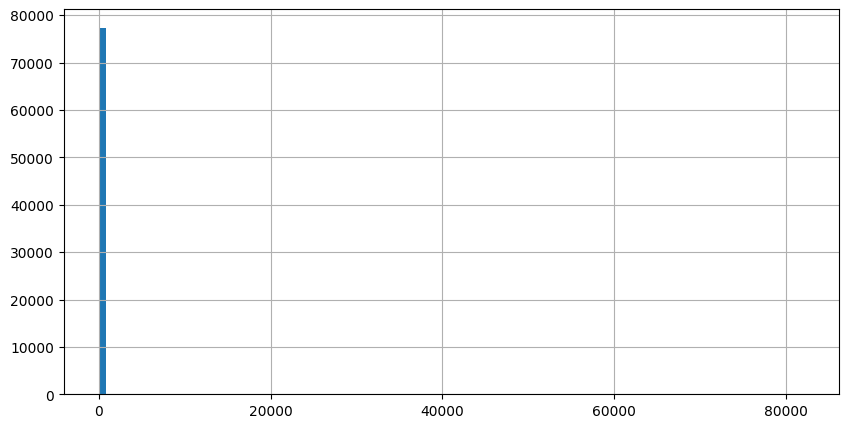

In [37]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize = (10,5))

<AxesSubplot:>

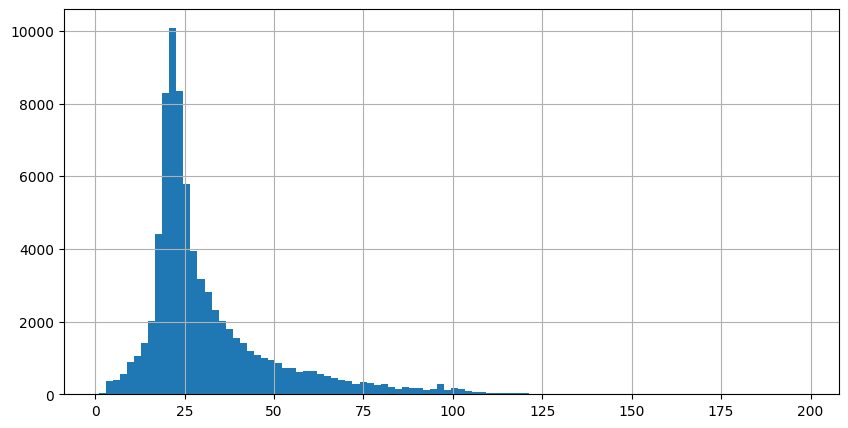

In [38]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize = (10,5))

### Benchmark Model

In [39]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [40]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_features_benchmark = 'total_amount'

#### 5.1. Train-test Split

In [41]:
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size = 0.33, random_state = 42)

#### 5.2. Fit a model to the data

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

#### 5.3. Model Evaluation

In [43]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_absolute_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2_score', r2_score(y_test_b, y_pred_b))

mean_absolute_error 6.510805348699038
mean_squared_error 157.2781684509144
root_mean_absolute_error 12.54105930338081
r2_score 0.5790736305744657


<AxesSubplot:xlabel='true', ylabel='pred'>

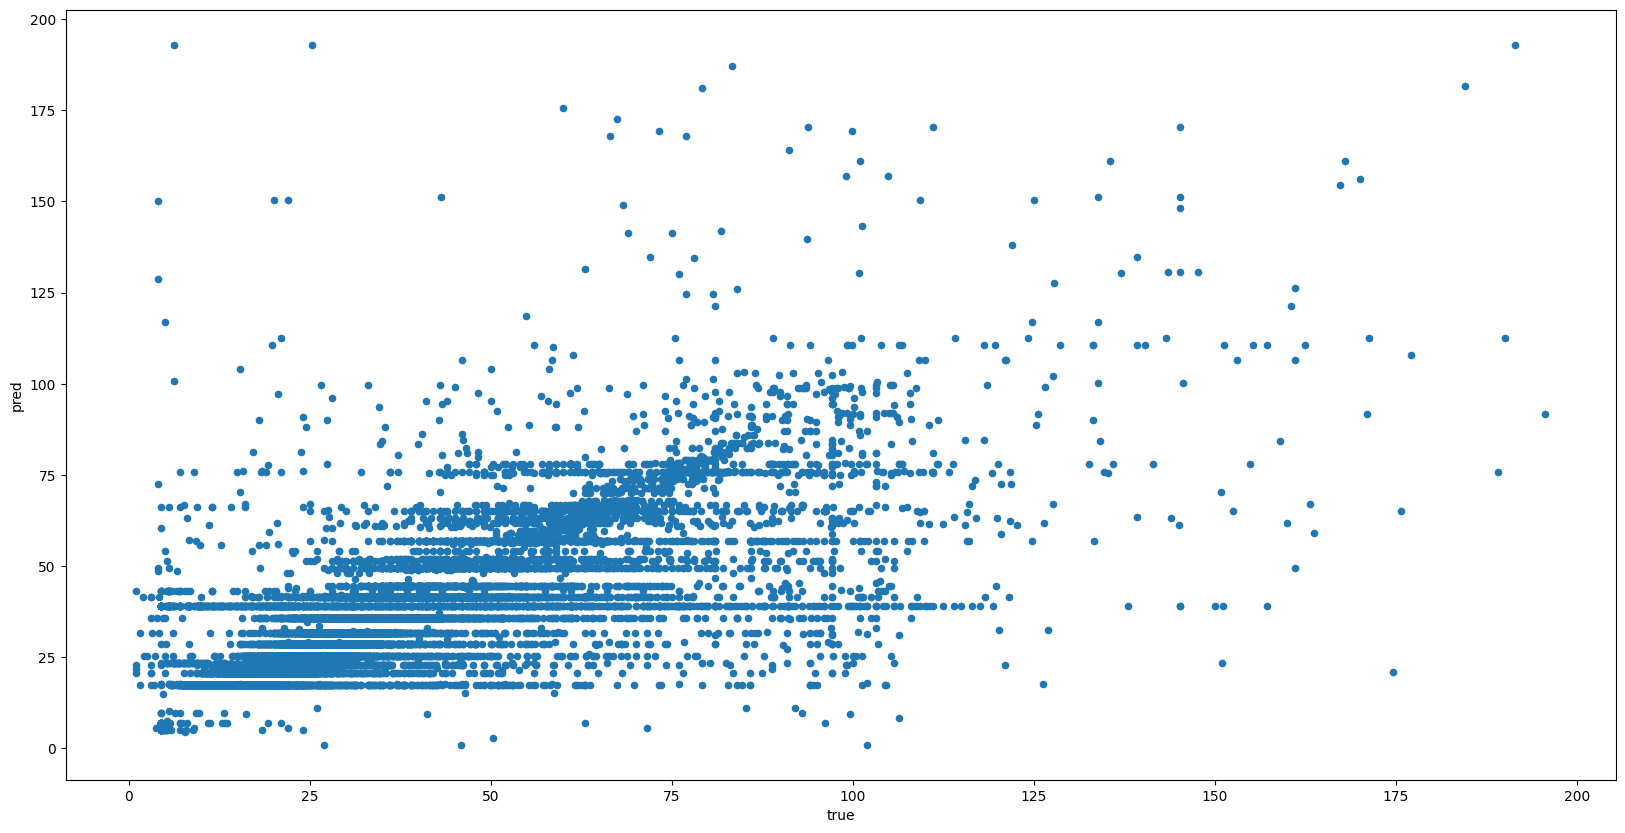

In [44]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x ='true', y='pred')

#### 5.4. Fix Problems

In [45]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_features_benchmark = 'total_amount'

from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size = 0.33, random_state = 42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_absolute_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2_score', r2_score(y_test_b, y_pred_b))



mean_absolute_error 11.468014900455689
mean_squared_error 290.66276695022964
root_mean_absolute_error 17.048834768107458
r2_score 0.22209404887796425


<AxesSubplot:xlabel='true', ylabel='pred'>

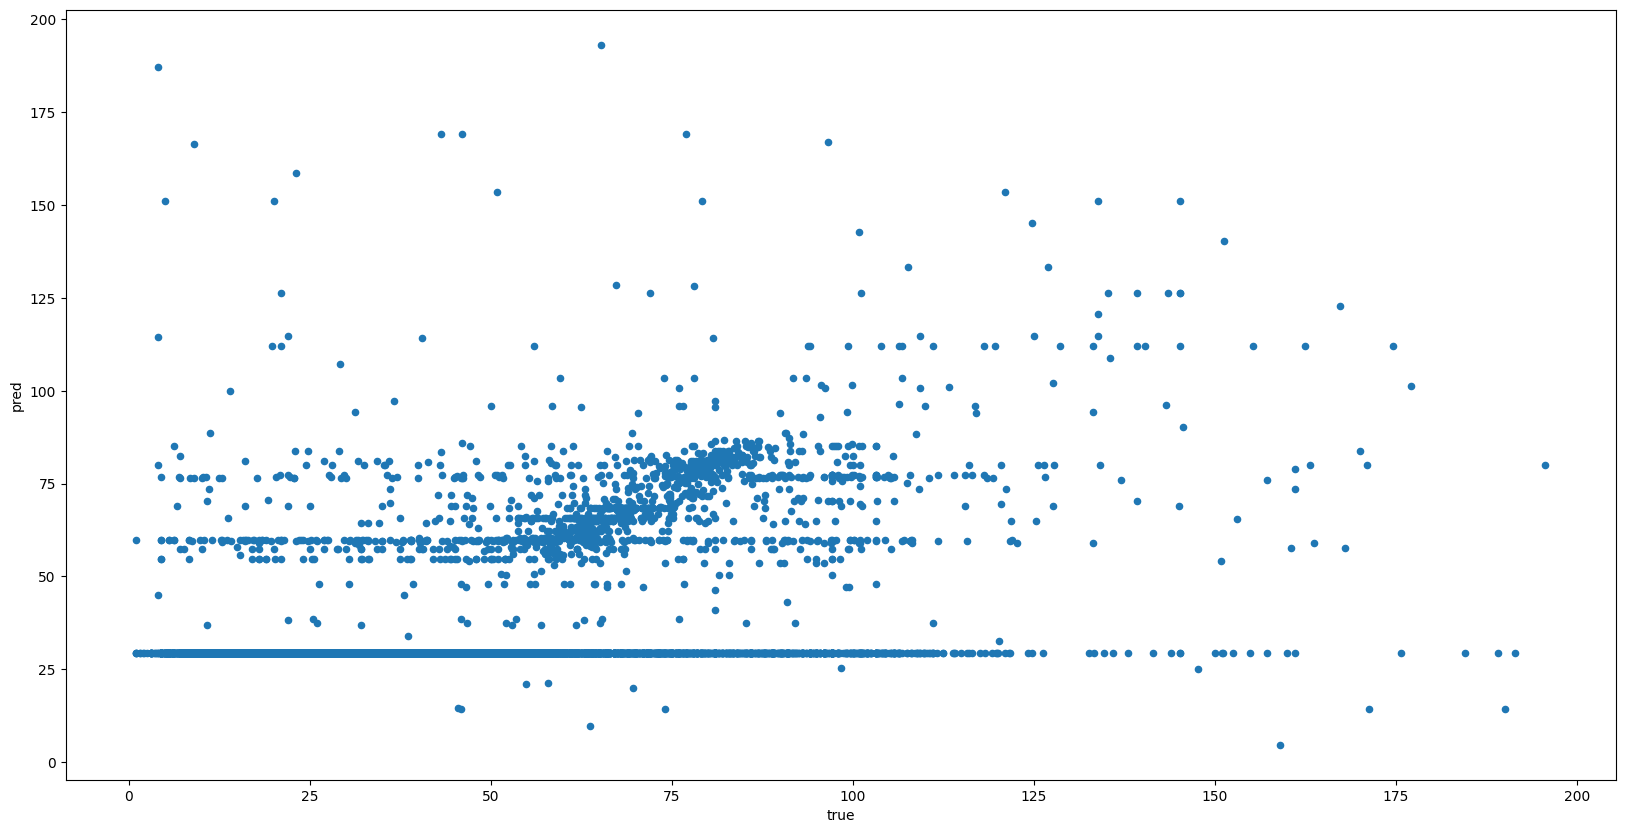

In [46]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x ='true', y='pred')

### 6. Feature Engineering

In [47]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [48]:
data_with_new_features = taxi_grouped_by_region.copy()

#### Data-related features

In [49]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x==5 or x==6 else False)


In [50]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [51]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False


#### Borough Information

In [52]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [53]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [54]:
data_with_new_features['Borough'].value_counts()

Manhattan        42073
Queens           14966
Brooklyn         13553
Bronx             5279
Unknown            722
EWR                181
Staten Island       68
Name: Borough, dtype: int64

In [55]:
nyc_weather = pd.read_csv('nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [56]:
nyc_weather.shape

(2936, 6)

In [57]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [58]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [59]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [60]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [61]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [62]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [63]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [64]:
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [65]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [66]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [67]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(77408, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,...,EWR,2019-01-01 13:00:00,12.2,51.0,9.0,0.7,0.446667,13.0,1.0,1.0
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [69]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR,12.2,51.0,9.0,0.7,0.446667
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN


In [70]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      566
temperature                51683
humidity                   51683
wind speed                 51683
cloud cover                51683
amount of precipitation    51683
dtype: int64

In [71]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [72]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate(method='pad')  # This is equivalent to ffill
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [73]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2024-01-01,1,1,0,4.810000,40.748333,6,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2024-01-01,1,1,0,1.611111,24.853333,9,0,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0
2,101,2024-01-01,1,1,0,11.320000,51.580000,1,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0
3,102,2024-01-01,1,1,0,5.150000,23.270000,1,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0
4,107,2024-01-01,1,1,0,1.988056,22.900556,180,0,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0


### 7. Model Training

In [74]:
data_for_model = nyc_taxi_with_weather.copy()

In [75]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

#### Train-test split

In [76]:
from sklearn.model_selection import train_test_split

x = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#### 7.1. Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [78]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.991490097421073
mean_squared_error 265.9219493389751
root_mean_squared_error 16.30711345821127
r2 0.31195154042933837


<AxesSubplot:xlabel='true', ylabel='pred'>

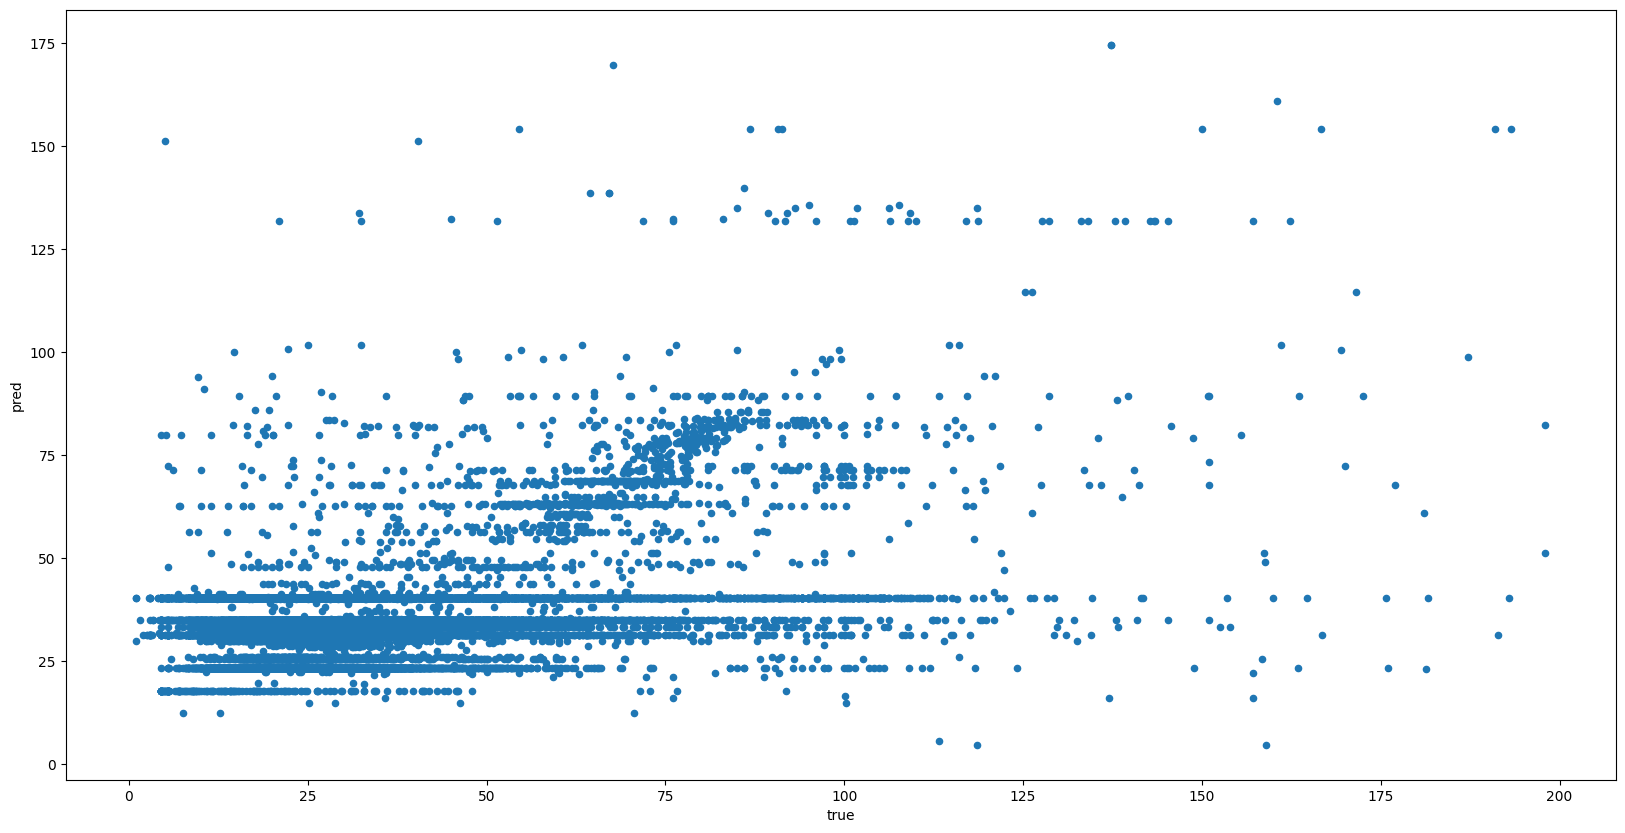

In [79]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

#### Overfit

##### The model fits the training data's pattern so much that it loses the ability to generalise.

In [80]:
x_train_overfit = x_train
y_train_overfit = y_train

x_test_overfit = x_test
y_test_overfit = y_test

In [81]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(x_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(x_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(x_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [82]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,17.611600,17.920060
1,5,16.452786,16.780904
2,8,15.772659,16.371790
3,10,15.254220,16.319847
4,15,13.895815,16.519682
5,20,12.636170,17.177166
6,30,10.064780,18.289921
7,50,4.545890,20.189534
8,70,0.902987,20.776195
9,100,0.000000,20.755367


Text(0, 0.5, 'root mean squared error')

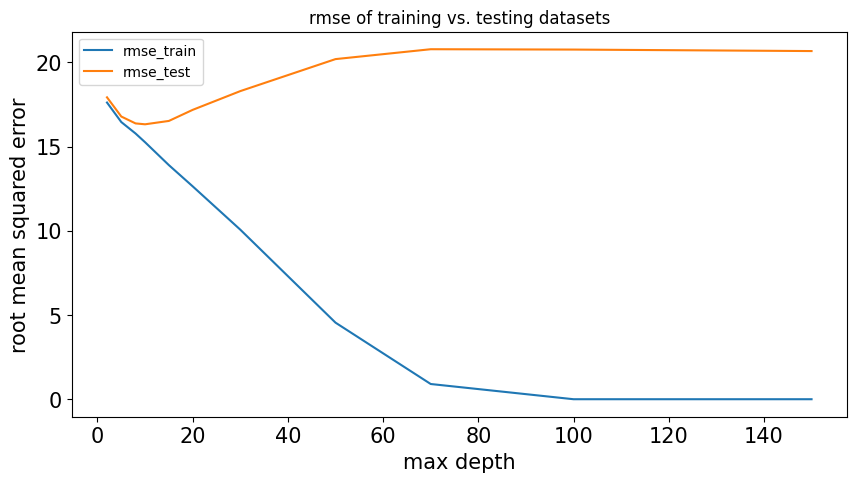

In [83]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

#### Underfit
##### Underfit is when the model cannot capture the data's pattern at all

In [84]:
x_train_underfit = x_train
y_train_underfit = y_train

x_test_underfit = x_test
y_test_underfit = y_test

In [85]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(x_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(x_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 11.758714591273431
mean_squared_error 325.70471684652404
root_mean_squared_error 18.047291122119244
r2 0.13736683296178265


In [86]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(x_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 11.843316141910208
mean_squared_error 334.984114666747
root_mean_squared_error 18.302571258343647
r2 0.13325957240448116


#### 7.2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(x_train, y_train)

In [88]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.317495055211301
mean_squared_error 250.49861640197963
root_mean_squared_error 15.827148081760644
r2 0.3518579885248203


<AxesSubplot:xlabel='true', ylabel='pred'>

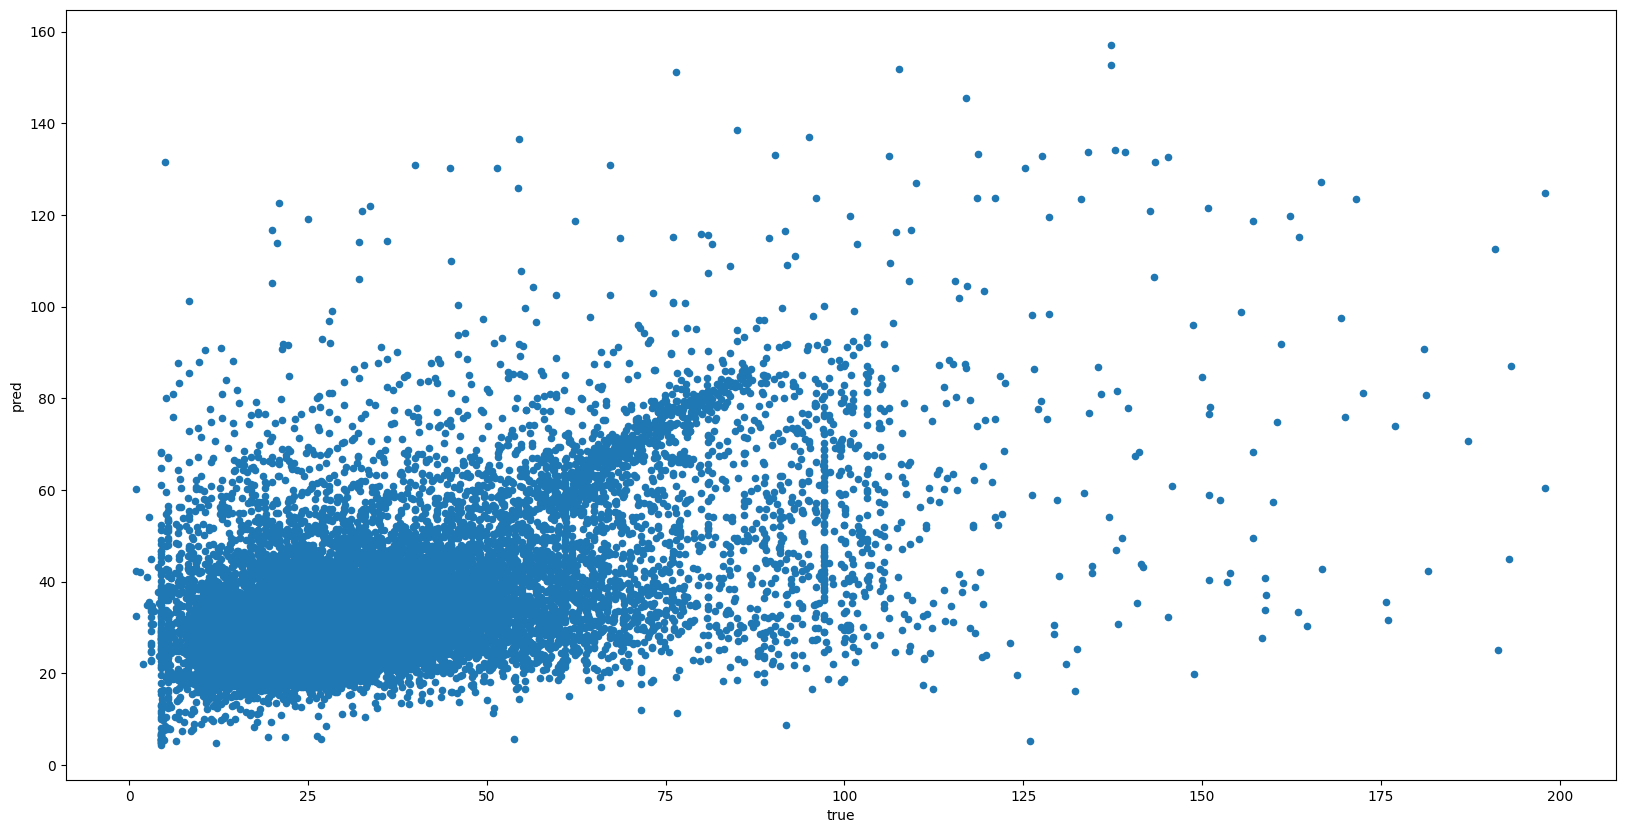

In [89]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

#### 7.3. Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(x_train, y_train)

GradientBoostingRegressor()

In [91]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.915556035854463
mean_squared_error 243.6583648589959
root_mean_squared_error 15.609560046939052
r2 0.36955650701464393


<AxesSubplot:xlabel='true', ylabel='pred'>

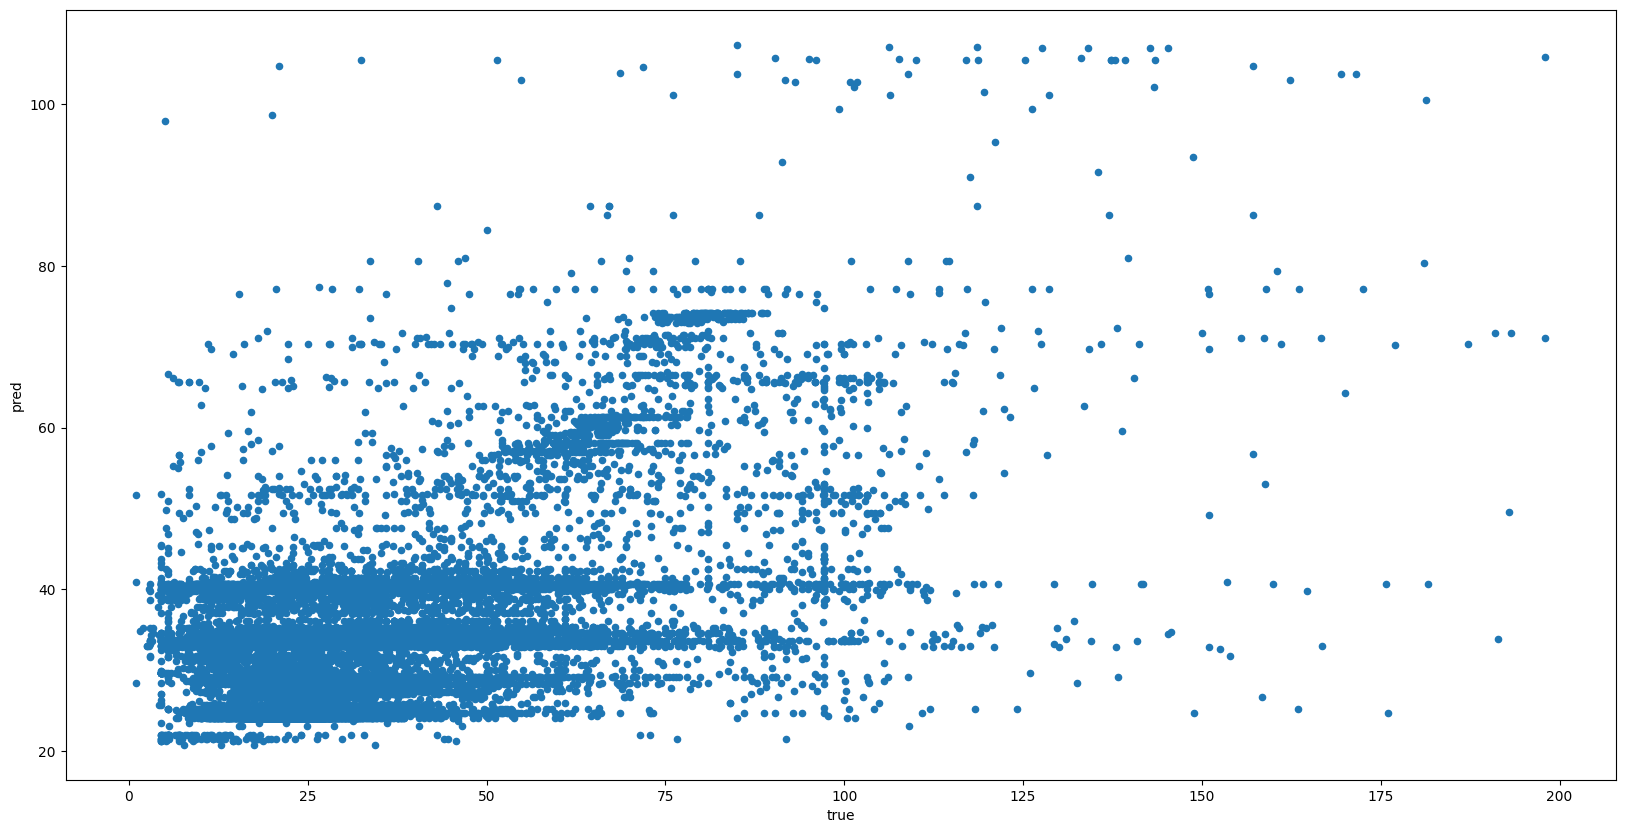

In [92]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

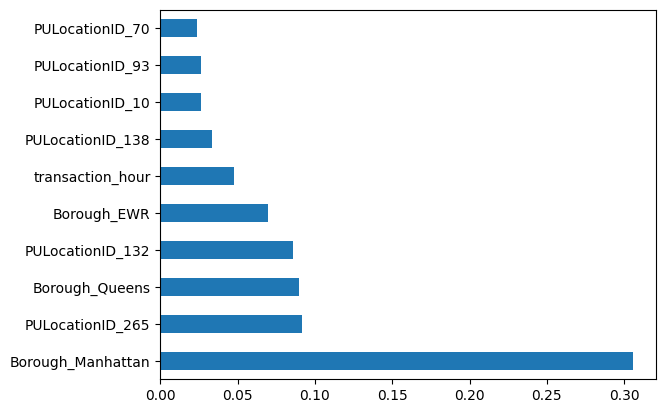

In [94]:
(pd.Series(model_at_hand.feature_importances_, index=x_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

### 8. Tuning

#### 8.1. Find Best parameters

In [95]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [104]:
import pprint as pp

# Create the random grid
random_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [5, 10, 15],        
    'min_samples_split': [2, 5],    
}
pp.pprint(random_grid)

{'max_depth': [5, 10, 15],
 'min_samples_split': [2, 5],
 'n_estimators': [10, 50, 100]}


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define model
rf = RandomForestRegressor()

# Optimize RandomizedSearchCV parameters
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid, 
    n_iter=5,  # Reduce iterations
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=1,  # Reduce parallel jobs to prevent memory issues
    pre_dispatch="2*n_jobs"  # Prevent excessive memory allocation
)

# Use a smaller dataset to speed up tuning
x_train_sample = x_train.sample(frac=0.3, random_state=42)  
y_train_sample = y_train.loc[x_train_sample.index]

# Train the optimized model
rf_random.fit(x_train_sample, y_train_sample)

# Store results
performances = pd.DataFrame.from_dict(rf_random.cv_results_)
print(performances)



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=   1.9s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=   1.7s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=   1.7s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  21.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  13.8s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  13.9s
[CV] END .max_depth=5, min_samples_split=5, n_est

In [107]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.610655,0.092466,0.214375,0.003489,10,2,5,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.264331,0.287993,0.307263,0.286529,0.017558,4
1,5.444727,0.350909,0.212244,0.028763,50,2,5,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.267829,0.289215,0.306462,0.287835,0.015802,2
2,19.862546,1.286945,0.265158,0.044029,100,2,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.328199,0.346358,0.370719,0.348425,0.017420,1
3,13.451646,0.326712,0.259950,0.021983,100,5,5,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.269269,0.284851,0.308214,0.287445,0.016005,3
4,1.582717,0.099484,0.192086,0.023125,10,5,5,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.261189,0.277697,0.304516,0.281134,0.017854,5


In [110]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(x_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  583.5493447780609  seconds
mean_absolute_error 9.215986784335023
mean_squared_error 228.72103817906182
root_mean_squared_error 15.123525983680585
r2 0.40820545885100157


In [111]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(x_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  60.59736371040344  seconds
mean_absolute_error 9.136465931252031
mean_squared_error 227.63517101741203
root_mean_squared_error 15.087583339203533
r2 0.41101503974392406


<AxesSubplot:xlabel='true', ylabel='pred'>

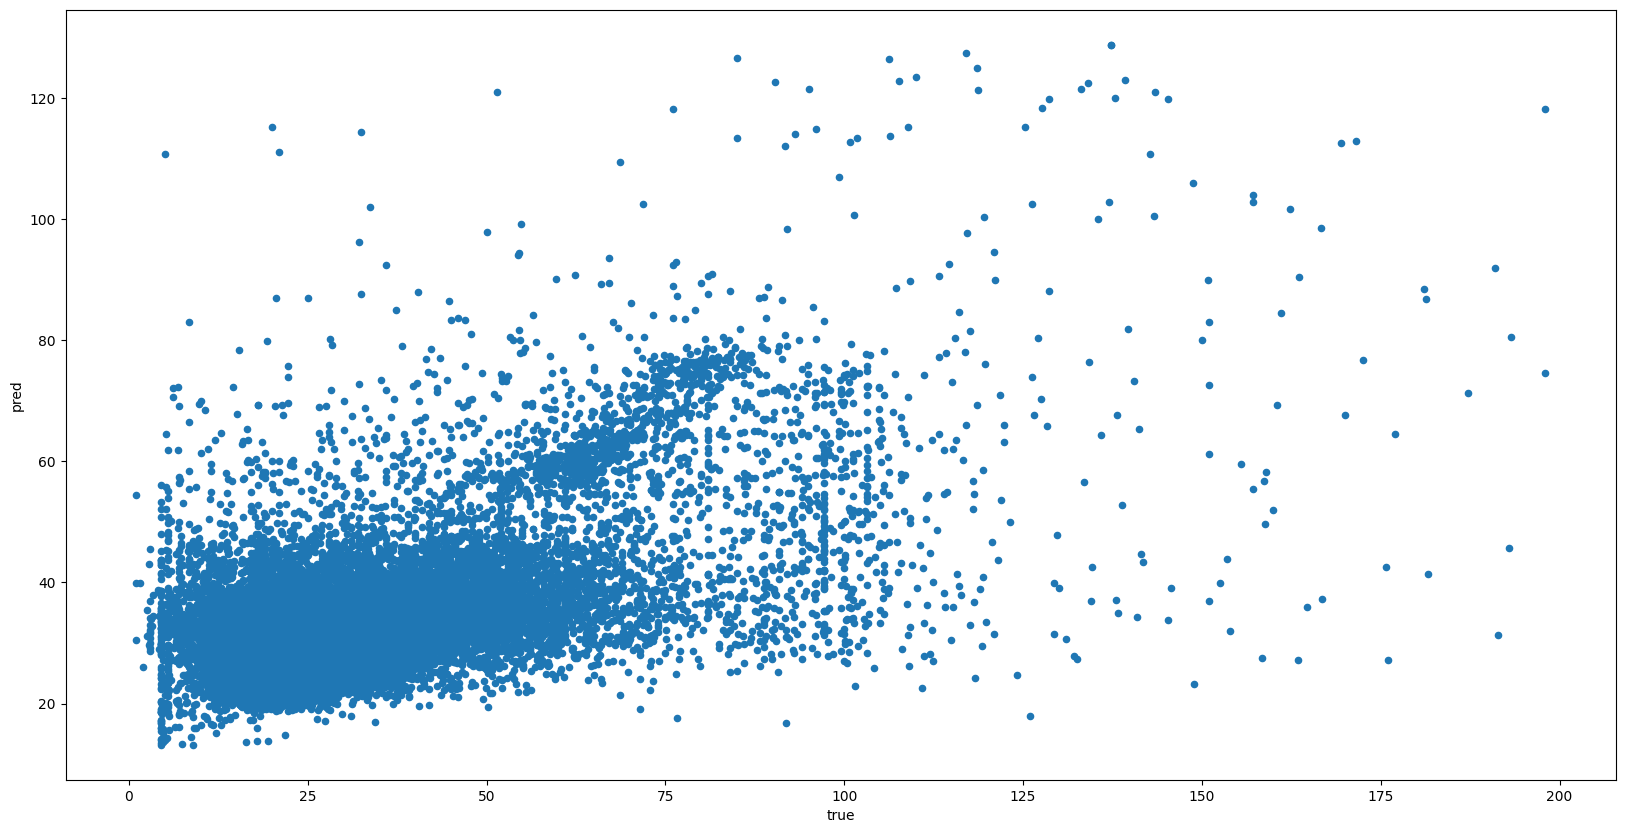

In [112]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 9. Classification

<AxesSubplot:>

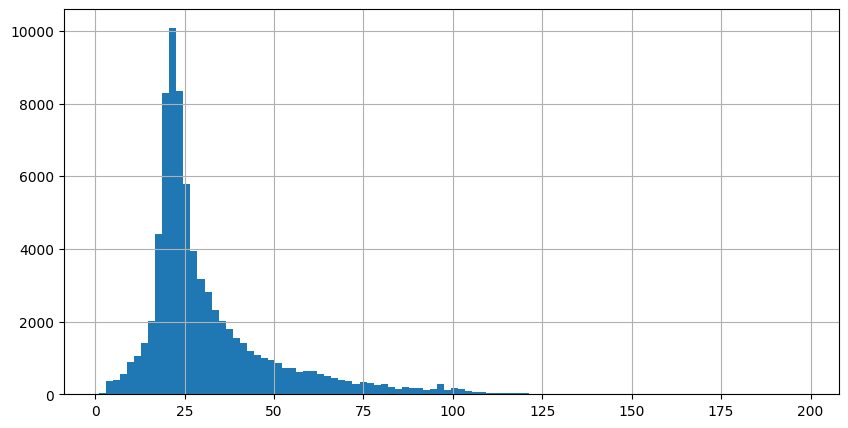

In [113]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [114]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2024-01-01,1,1,0,4.810000,40.748333,6,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0,high,1
1,100,2024-01-01,1,1,0,1.611111,24.853333,9,0,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,101,2024-01-01,1,1,0,11.320000,51.580000,1,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0,high,1
3,102,2024-01-01,1,1,0,5.150000,23.270000,1,0,False,False,Queens,8.3,97.0,0.0,1.0,29.0,high,1
4,107,2024-01-01,1,1,0,1.988056,22.900556,180,0,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1


In [115]:
nyc_class['earning_class'].value_counts()

high    72507
low      4901
Name: earning_class, dtype: int64

In [116]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [117]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [118]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[  191  1425]
 [  459 23470]]
accuracy 0.9262477980035232
precision 0.9427595902791726
recall 0.9808182540014209


<AxesSubplot:>

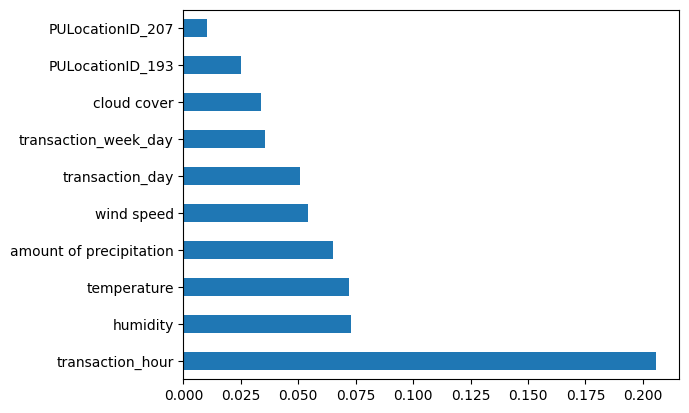

In [121]:
(pd.Series(clf.feature_importances_, index=x_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 